# 波士顿房价数据探索

该数据集来自UCI机器学习知识库。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋13种特征和房价中位数的信息。
本项目将原始数据集存为csv格式，方便调用pandas做数据分析。

在开始一项新任务时，通过可视化手段探索数据往往是任务的第一步，从而根据数据特点选择合适的数据预处理方式和机器学习模型。
相比直接阅读许多行原始数据，图表汇总数据能更好地帮助我们把握数据的要点。

## 1_EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dpath = './data/'
df = pd.read_csv(dpath + 'boston_housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.5 KB


In [4]:
df.shape

(506, 14)

一、样本数N：506

二、特征维数：13，每个特征的数据类型，非空值的样本数目
1. CRIM：人均犯罪率 ；
2. ZN：住宅用地的比例（对超过两万五千平方英尺的区域） ；整数
3. INDUS：城镇中非零售营业比例；
4. CHAS：是否靠近Charles河的边界；整数
5. NOX：一氧化氮浓度 ；
6. RM：住宅平均房间数；
7. AGE：1940年之前建造的自住房屋的比例；
8. DIS：距离波士顿五个中心的加权距离；
9. RAD：高速公路的便利指数（索引）；整数
10. TAX ：每一万美元财产的全额财产税率； 整数
11. PTRATIO ：城乡师生比例；PTRATIO
12. B ：黑人比例
13. LSTAT ：低收入人群比例

三、标签y
MEDV ：自住房屋价格的中值

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 标签y数据探索

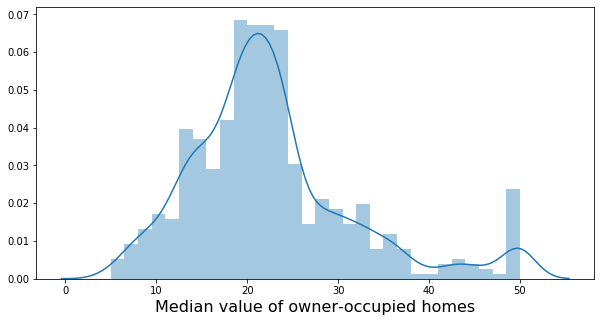

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df['MEDV'], bins=30, kde=True)
plt.xlabel("Median value of owner-occupied homes", fontsize=16)
plt.show()

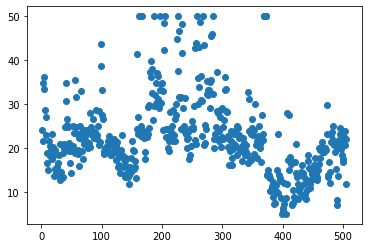

In [7]:
plt.scatter(range(1, 507), df['MEDV'])
plt.show()

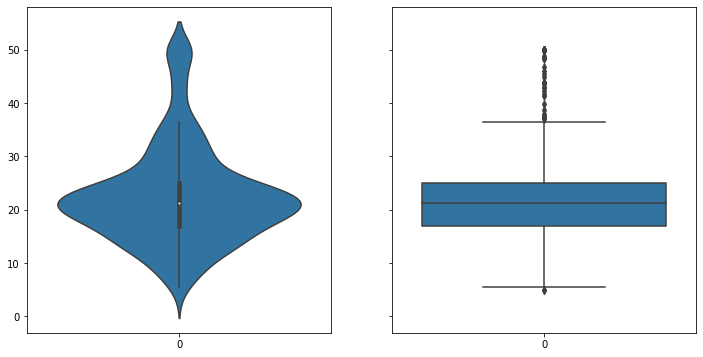

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
sns.violinplot(data=df['MEDV'], ax=axes[0])
sns.boxplot(data=df['MEDV'], ax=axes[1])
plt.show()

可以看出，标签y主要集中在20附近，和正态分布比较接近。但较小的值比较密集，较大的值比较散（长尾），取值为最大值50的样本数较多（猜测是对大值做了截断），在模型训练时也可以考虑将y等于50的样本当成outliers（离群点）去掉。

另外对价格类特征，由于人对数值的敏感程度不是线性，可考虑对其进行log变换(Numpy的log1p)

### 特征变量数据探索

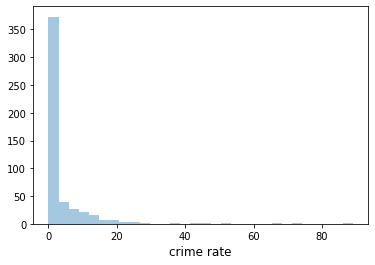

In [9]:
sns.distplot(df["CRIM"], bins=30, kde=False)
plt.xlabel("crime rate", fontsize=12)
plt.show()  
# 犯罪率特征的分布是长尾分布，和指数分布比较接近。大部分城镇的犯罪率很低，极少数样本的犯罪率高。可以考虑对该特征进行log(x+1)变换

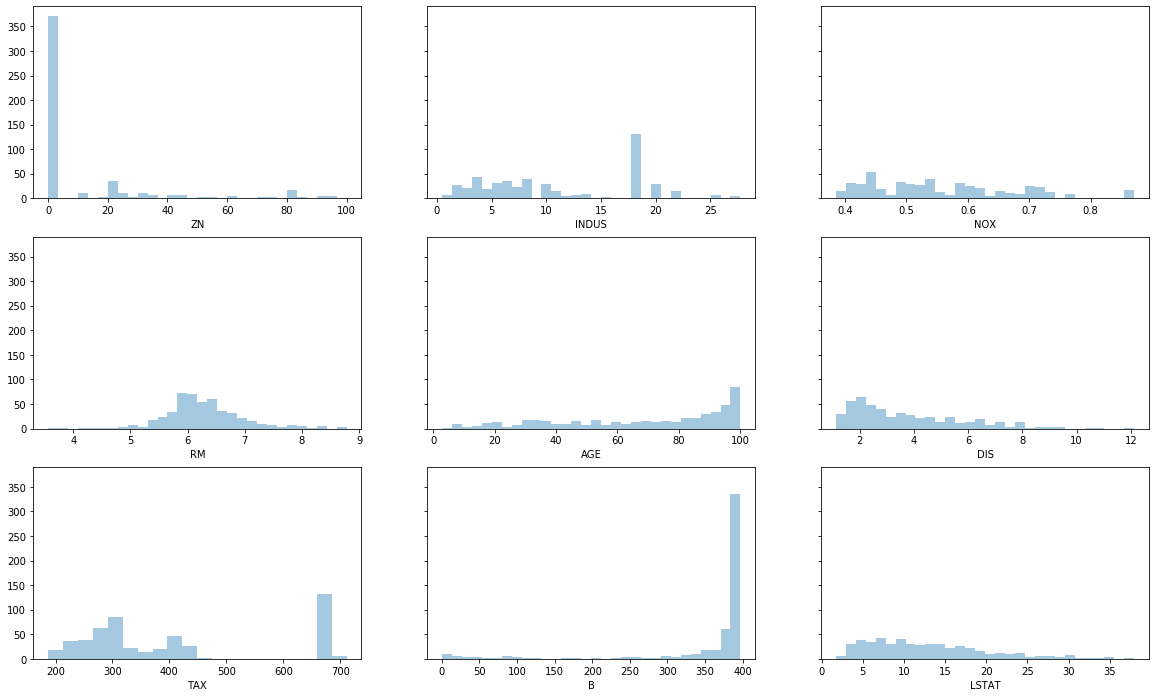

In [10]:
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
sns.distplot(df["ZN"], bins=30, kde=False, ax=axes[0,0])
sns.distplot(df["INDUS"], bins=30, kde=False, ax=axes[0,1])
sns.distplot(df["NOX"], bins=30, kde=False, ax=axes[0,2])
sns.distplot(df["RM"], bins=30, kde=False, ax=axes[1,0])
sns.distplot(df["AGE"], bins=30, kde=False, ax=axes[1,1])
sns.distplot(df["DIS"], bins=30, kde=False, ax=axes[1,2])
sns.distplot(df["TAX"], bins=20, kde=False, ax=axes[2,0])
sns.distplot(df["B"], bins=30, kde=False, ax=axes[2,1])
sns.distplot(df["LSTAT"], bins=30, kde=False, ax=axes[2,2])
plt.show()

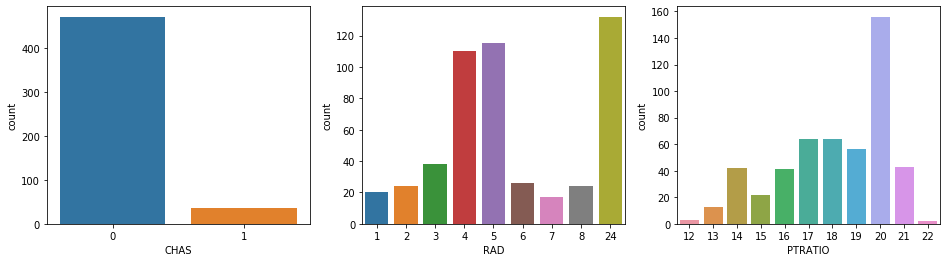

In [11]:
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(16, 4))
sns.countplot(df["CHAS"], order=[0, 1], ax=axes[0])
sns.countplot(df["RAD"], ax=axes[1])
sns.countplot(df["PTRATIO"], ax=axes[2])
plt.show()

In [12]:
features = ['CHAS', 'RAD', 'PTRATIO']
for feature in features:
    print(df[feature].value_counts())

0    471
1     35
Name: CHAS, dtype: int64
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64
20    156
18     64
17     64
19     56
21     43
14     42
16     41
15     22
13     13
12      3
22      2
Name: PTRATIO, dtype: int64


### 两两特征之间的相关性

In [13]:
feature_corr = df.corr()
feature_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200294,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.303369,-0.385064,0.455621,-0.388305
ZN,-0.200294,1.000000,-0.533583,-0.042533,-0.516310,0.312218,-0.569483,0.663845,-0.311712,-0.314338,-0.377985,0.175341,-0.413195,0.360580
INDUS,0.406583,-0.533583,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.398443,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042533,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.129580,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516310,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.208947,-0.380051,0.590879,-0.427321
RM,-0.219247,0.312218,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.347275,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569483,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.274111,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.663845,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.241996,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311712,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.485530,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314338,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.478160,-0.441808,0.543993,-0.468536


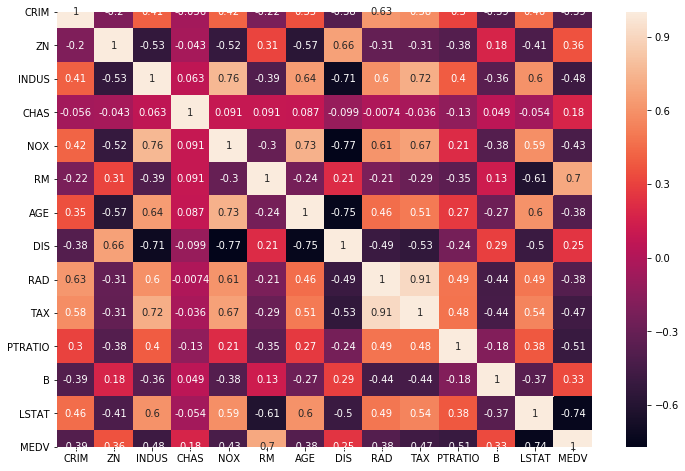

In [14]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(feature_corr, annot=True)
plt.show()

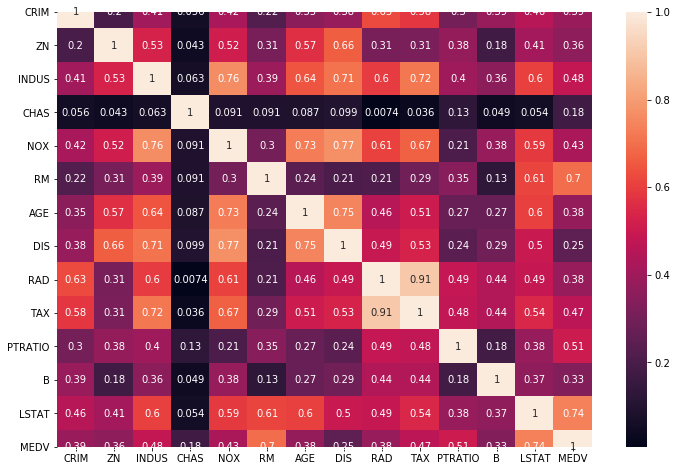

In [15]:
feature_corr = feature_corr.abs()  # 取绝对值
plt.figure(figsize=(12, 8))
sns.heatmap(feature_corr, annot=True);

In [16]:
threshold = 0.5
corr_list = []
size = feature_corr.shape[0]

for i in range(0, size):
    for j in range(i+1, size):
        if (feature_corr.iloc[i, j] >= threshold) & (feature_corr.iloc[i, j] <= 1.0):
            corr_list.append([feature_corr.iloc[i, j], i, j])
corr_list            

[[0.6255051452626011, 0, 8],
 [0.5827643120325846, 0, 9],
 [0.5335828984741289, 1, 2],
 [0.5163097674725308, 1, 4],
 [0.5694833933259462, 1, 6],
 [0.6638446841957253, 1, 7],
 [0.7636514469209145, 2, 4],
 [0.644778511355255, 2, 6],
 [0.7080269887427683, 2, 7],
 [0.5951292746038486, 2, 8],
 [0.7207601799515441, 2, 9],
 [0.6037997164766213, 2, 12],
 [0.7314701037859578, 4, 6],
 [0.7692301132258261, 4, 7],
 [0.6114405634855754, 4, 8],
 [0.6680232004030201, 4, 9],
 [0.5908789208808449, 4, 12],
 [0.6138082718663959, 5, 12],
 [0.6953599470715394, 5, 13],
 [0.7478805408686316, 6, 7],
 [0.506455593550705, 6, 9],
 [0.6023385287262399, 6, 12],
 [0.5344315844084561, 7, 9],
 [0.9102281885331822, 8, 9],
 [0.543993412001569, 9, 12],
 [0.5063983052129793, 10, 13],
 [0.7376627261740143, 12, 13]]

In [17]:
s_corr_list = sorted(corr_list, key=lambda x : -x[0])
#s_corr_list
cols = df.columns
for v,i,j in s_corr_list:
    print('%s and %s = %.2f' % (cols[i], cols[j], v))

RAD and TAX = 0.91
NOX and DIS = 0.77
INDUS and NOX = 0.76
AGE and DIS = 0.75
LSTAT and MEDV = 0.74
NOX and AGE = 0.73
INDUS and TAX = 0.72
INDUS and DIS = 0.71
RM and MEDV = 0.70
NOX and TAX = 0.67
ZN and DIS = 0.66
INDUS and AGE = 0.64
CRIM and RAD = 0.63
RM and LSTAT = 0.61
NOX and RAD = 0.61
INDUS and LSTAT = 0.60
AGE and LSTAT = 0.60
INDUS and RAD = 0.60
NOX and LSTAT = 0.59
CRIM and TAX = 0.58
ZN and AGE = 0.57
TAX and LSTAT = 0.54
DIS and TAX = 0.53
ZN and INDUS = 0.53
ZN and NOX = 0.52
AGE and TAX = 0.51
PTRATIO and MEDV = 0.51


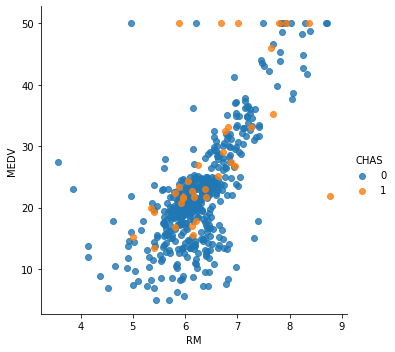

In [18]:
sns.lmplot('RM', 'MEDV', data=df, hue='CHAS', fit_reg=False);

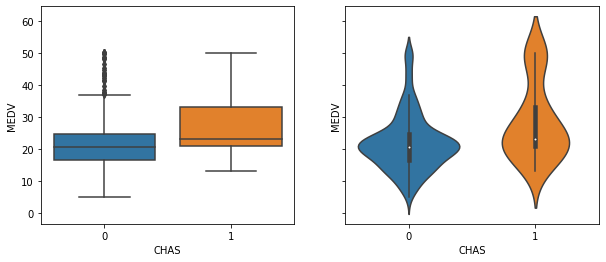

In [19]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x="CHAS", y="MEDV", data=df, ax=axes[0]) 
sns.violinplot(x="CHAS", y="MEDV", data=df, ax=axes[1]);

## 2_FE

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


In [21]:
# 删除标签y=50的样本点
df = df[df['MEDV'] < 50]
df.shape

(490, 14)

In [22]:
y = df['MEDV']
log_y = np.log1p(y)
X = df.drop('MEDV', axis=1)

In [23]:
X['RAD'].astype(object)
X_cat = X['RAD']
X_cat = pd.get_dummies(X_cat, prefix='RAD')
X = X.drop('RAD', axis=1)
feat_names = X.columns
X_cat.head()

,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()
ss_log_y = StandardScaler()

X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y.values.reshape(-1, 1))
log_y = ss_log_y.fit_transform(log_y.values.reshape(-1, 1))

In [25]:
X[:3]

array([[-0.41740129,  0.30269601, -1.29185589, -0.25081213, -0.13989479,
         0.50503976, -0.10943189,  0.12120789, -0.66710128, -1.4151789 ,
         0.44353452, -1.12267925],
       [-0.41499231, -0.48647892, -0.59332877, -0.25081213, -0.73182065,
         0.26901737,  0.37748816,  0.53733022, -0.98873354, -0.51636145,
         0.44353452, -0.53477219],
       [-0.41499461, -0.48647892, -0.59332877, -0.25081213, -0.73182065,
         1.43993368, -0.25515249,  0.53733022, -0.98873354, -0.51636145,
         0.39955339, -1.25693687]])

In [26]:
fe_data = pd.DataFrame(data=X, columns=feat_names, index = df.index)
fe_data = pd.concat([fe_data, X_cat], axis=1, ignore_index=False)
fe_data["MEDV"] = y
fe_data["log_MEDV"] = log_y
fe_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,MEDV,log_MEDV
0,-0.417401,0.302696,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.667101,-1.415179,...,0,0,0,0,0,0,0,0,0.300878,0.446452
1,-0.414992,-0.486479,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.988734,-0.516361,...,1,0,0,0,0,0,0,0,-0.004571,0.166718
2,-0.414995,-0.486479,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.988734,-0.516361,...,1,0,0,0,0,0,0,0,1.662674,1.433933
3,-0.414412,-0.486479,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-1.107857,-0.066953,...,0,1,0,0,0,0,0,0,1.497222,1.331120
4,-0.410202,-0.486479,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-1.107857,-0.066953,...,0,1,0,0,0,0,0,0,1.853580,1.548010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.410939,-0.486479,0.119873,-0.250812,0.160357,0.532627,0.029180,-0.643288,-0.804093,1.281273,...,0,0,0,0,0,0,0,0,0.097245,0.263134
502,-0.412931,-0.486479,0.119873,-0.250812,0.160357,-0.192299,0.299297,-0.733952,-0.804093,1.281273,...,0,0,0,0,0,0,0,0,-0.131842,0.041281
503,-0.411153,-0.486479,0.119873,-0.250812,0.160357,1.119618,0.807542,-0.790883,-0.804093,1.281273,...,0,0,0,0,0,0,0,0,0.288151,0.435344
504,-0.405549,-0.486479,0.119873,-0.250812,0.160357,0.840682,0.747121,-0.685845,-0.804093,1.281273,...,0,0,0,0,0,0,0,0,0.046337,0.215345


In [27]:
fe_data.to_csv(dpath + 'FE_boston_housing_try.csv', index=False)